

**Abstract**

El presente estudio trata de responder a los siguientes interrogantes: ¿Estamos ante una crisis climática, esto es, el aumento sostenido de la variación de la temperatura? ¿Es una tendencia que se mantendrá a lo largo de los próximos años? ¿Como será su evolución en Argentina y en la región en los próximos años? La principal hipótesis que tratamos de comprobar es que, actualmente, estamos viviendo una crisis climática tal como sugieren distintos estudios científicos realizados por la ONU. Para responder este interrogante se llevó a cabo el análisis estadístico de los datos proporcionados por GISTEMP y NASA-GISS. A partir de este, obtuvimos un gráfico de serie de tiempo que nos permite observar el patrón alcista de la temperatura acumulada en el rango 1961-2019. Además, en el grafico [1], [2] y [3] se pueden observar su evolución en algunos países latinoamericanos y la variación de temperatura entre el primer año que se analizó y el ultimo en [4] y [8]

Finalmente, si observamos los gráficos [5] y [6] podemos resaltar que la temperatura acumulada correspondiente al periodo son muchos mas elevadas que durante el año.

**Objetivo**

Motivados por las recientes temperaturas que se están presentando en el mundo que son sin precedentes queremos ofrecer un estudio que ayude a empresas e instituciones gubernamentales a prepararse para afrontar esta situación. Nuestro objetivo es por medio de regresión estimar futuras temperaturas de modo tal que sea predecible y poder actuar en modo proactivo.

Prevención de problemas a nivel urbano:

https://www.bloomberg.com/news/articles/2022-07-19/british-rails-buckle-under-record-heat-in-europe-s-summer-of-woe

A nivel gubernamental: https://www.boe.es/buscar/doc.php?id=BOE-A-2021-8447

**Contexto comercial**

En la sección anterior se puede apreciar como este cambio en la temperatura ha forzado a instituciones y gobiernos a implementar medidas de forma repentina por lo que además de conocer un valor futuro para la temperatura es muy util conocer la correlación que pueden tener con otros fenómenos como:

Deforestación
Emisiones de C02
Desertificación
Energía usada
Problema comercial

Se buscaría prever los cambios o impactos de estas temperaturas en caso salgan de lo normal. Ejemplo, actualmente en Inglaterra donde no se tienen jamás 40 grados han tenido que envolver puentes y pintar vías de tren en blanco para evitar la dilatación de los materiales. En Europa en general a estas temperaturas se refuerza la atención a a adultos mayores que sufren de problemas de deshidratación en estas épocas. Por lo que de cara a lo que podamos predecir para este verano se podría tomar nota de estas acciones.

**Contexto analítico**

Buscaríamos más datasets para buscar correlaciones en: https://www.worldometers.info/

El actual dataset que se trabajó cubre el período 1961-2019. Las estadísticas están disponibles para las anomalías de temperatura media mensual, estacional y anual, es decir, el cambio de temperatura con respecto a una climatología de referencia, correspondiente al período 1951-1980. Los datos se basan en los datos GISTEMP disponibles públicamente, los datos de cambio de temperatura de la superficie global distribuidos por el Instituto Goddard de Estudios Espaciales de la Administración Nacional de Aeronáutica y del Espacio (NASA-GISS).

-Area Code -Area -Months Code -Months -Element Code -Element -Unit

En el dataset se muestra la temperatura y desviación estándar de cada año en 284 áreas geográficas.


In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import isnan

In [101]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
%cd '/content/gdrive/MyDrive/dataScience'

/content/gdrive/MyDrive/dataScience


In [103]:
!head 'Environment_Temperature_change_E_All_Data_NOFLAG.csv'

head: cannot open 'Environment_Temperature_change_E_All_Data_NOFLAG.csv' for reading: No such file or directory


#Al iniciar nuestro proyecto nos enfocamos en predecir la temperatura. Sin embargo, el primer dataset que obtuvimos sólo contaba con la tasa de cambio, fechas y países. Por ello, tuvimos que buscar variables para enriquercerlo y encontrar correlación entre variables y la temperatura. 

# Como parte del proceso de construcción del dataset final, nos toco homologar las variables y quedarnos con las que tenían más valores llenos. Además, nos concentramos en los datos de Argentina.

Se cuentan los NULL

Para reemplazar los valores con null de las variables sacamos la media y reemplzamos

In [104]:
dg= pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/Environment_Temperature_change_E_All_Data_NOFLAG.csv',sep=',', encoding='cp1252')
de=dg[['Area','Months','Element','Y1990','Y1991','Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999','Y2000','Y2001','Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010','Y2011','Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']]
de

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.6,0.0,0.6,-0.8,1.1,1.3,-0.7,...,3.6,1.2,-0.6,1.2,1.8,1.9,3.4,1.2,2.0,3.0
1,Afghanistan,January,Standard Deviation,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2,Afghanistan,February,Temperature change,-0.3,-1.4,-0.1,1.4,-1.4,-0.1,0.9,...,1.2,0.3,-3.2,1.5,-3.2,2.7,2.3,-0.3,2.7,0.1
3,Afghanistan,February,Standard Deviation,2.6,2.6,2.6,2.6,2.6,2.6,2.6,...,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6
4,Afghanistan,March,Temperature change,-1.0,-0.9,-2.2,-1.4,1.3,-1.5,-0.3,...,3.4,0.7,-0.5,2.2,-0.1,-0.5,2.3,0.8,4.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,Jun–Jul–Aug,Standard Deviation,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
9652,OECD,Sep–Oct–Nov,Temperature change,0.2,0.0,-0.4,-0.4,0.6,0.3,-0.2,...,1.0,1.1,0.9,1.0,1.0,1.7,1.5,1.2,0.6,1.2
9653,OECD,Sep–Oct–Nov,Standard Deviation,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
9654,OECD,Meteorological year,Temperature change,0.5,0.5,0.3,0.2,0.5,0.7,0.1,...,1.2,0.8,1.3,1.0,0.8,1.3,1.9,1.3,1.1,1.3


In [105]:
My = de['Months'] == "Meteorological year"
My

0       False
1       False
2       False
3       False
4       False
        ...  
9651    False
9652    False
9653    False
9654     True
9655     True
Name: Months, Length: 9656, dtype: bool

In [106]:
de1= de[My]
de1

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
33,Afghanistan,Meteorological year,Standard Deviation,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
66,Albania,Meteorological year,Temperature change,0.8,-0.2,0.1,0.1,1.4,-0.1,0.0,...,1.3,1.1,1.6,1.5,1.4,1.7,1.7,1.3,2.2,1.9
67,Albania,Meteorological year,Standard Deviation,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,Annex I countries,Meteorological year,Standard Deviation,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
9620,Non-Annex I countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.5,0.6,0.4,...,1.2,0.8,0.8,1.0,1.0,1.3,1.4,1.3,1.2,1.4
9621,Non-Annex I countries,Meteorological year,Standard Deviation,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
9654,OECD,Meteorological year,Temperature change,0.5,0.5,0.3,0.2,0.5,0.7,0.1,...,1.2,0.8,1.3,1.0,0.8,1.3,1.9,1.3,1.1,1.3


In [107]:
 My2= de1['Element']=="Temperature change"
 My2.head()

32      True
33     False
66      True
67     False
100     True
Name: Element, dtype: bool

In [108]:
de2=de1[My2]
de2

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
66,Albania,Meteorological year,Temperature change,0.8,-0.2,0.1,0.1,1.4,-0.1,0.0,...,1.3,1.1,1.6,1.5,1.4,1.7,1.7,1.3,2.2,1.9
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
134,American Samoa,Meteorological year,Temperature change,0.5,0.8,0.9,NaN,NaN,0.9,0.8,...,1.3,0.8,0.9,1.2,1.1,0.9,1.6,1.3,1.1,1.5
168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,0.5,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.4,0.4,0.1,0.3,0.3,0.5,0.5,...,1.3,0.9,0.6,0.9,0.8,1.1,1.3,1.3,1.1,1.2
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,0.5,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4
9586,Annex I countries,Meteorological year,Temperature change,0.8,0.6,0.3,0.4,0.5,1.2,0.3,...,1.2,1.1,1.5,1.1,1.1,1.6,2.1,1.6,1.4,1.6
9620,Non-Annex I countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.5,0.6,0.4,...,1.2,0.8,0.8,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [109]:
de2 = de2.rename(columns=lambda x: x.replace('Y', ''))
de2

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
66,Albania,Meteorological year,Temperature change,0.8,-0.2,0.1,0.1,1.4,-0.1,0.0,...,1.3,1.1,1.6,1.5,1.4,1.7,1.7,1.3,2.2,1.9
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
134,American Samoa,Meteorological year,Temperature change,0.5,0.8,0.9,NaN,NaN,0.9,0.8,...,1.3,0.8,0.9,1.2,1.1,0.9,1.6,1.3,1.1,1.5
168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,0.5,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.4,0.4,0.1,0.3,0.3,0.5,0.5,...,1.3,0.9,0.6,0.9,0.8,1.1,1.3,1.3,1.1,1.2
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,0.5,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4
9586,Annex I countries,Meteorological year,Temperature change,0.8,0.6,0.3,0.4,0.5,1.2,0.3,...,1.2,1.1,1.5,1.1,1.1,1.6,2.1,1.6,1.4,1.6
9620,Non-Annex I countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.5,0.6,0.4,...,1.2,0.8,0.8,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [110]:
dgg=de2[My]
dgg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
66,Albania,Meteorological year,Temperature change,0.8,-0.2,0.1,0.1,1.4,-0.1,0.0,...,1.3,1.1,1.6,1.5,1.4,1.7,1.7,1.3,2.2,1.9
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
134,American Samoa,Meteorological year,Temperature change,0.5,0.8,0.9,NaN,NaN,0.9,0.8,...,1.3,0.8,0.9,1.2,1.1,0.9,1.6,1.3,1.1,1.5
168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,0.5,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.4,0.4,0.1,0.3,0.3,0.5,0.5,...,1.3,0.9,0.6,0.9,0.8,1.1,1.3,1.3,1.1,1.2
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,0.5,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4
9586,Annex I countries,Meteorological year,Temperature change,0.8,0.6,0.3,0.4,0.5,1.2,0.3,...,1.2,1.1,1.5,1.1,1.1,1.6,2.1,1.6,1.4,1.6
9620,Non-Annex I countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.5,0.6,0.4,...,1.2,0.8,0.8,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [111]:
range(1990, 2020)
map(str, range(1990, 2020))
cols = ['Months', 'Area'] + list(map(str, range(1990, 2020)))
cols[:5]


['Months', 'Area', '1990', '1991', '1992']

In [112]:
dgg = dgg.transpose()
dgg

,32,66,100,134,168,202,236,270,304,338,...,9348,9382,9416,9450,9484,9518,9552,9586,9620,9654
Area,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,Polynesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD
Months,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,...,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year
Element,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,...,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change
1990,0.8,0.8,1.3,0.5,1.7,0.7,0.2,0.3,0.2,0.4,...,0.4,1.4,0.5,0.7,0.5,0.4,0.5,0.8,0.5,0.5
1991,-0.2,-0.2,0.1,0.8,0.2,0.3,0.3,0.7,0.3,0.2,...,0.5,0.4,0.4,0.6,0.3,0.4,0.4,0.6,0.4,0.5
1992,-0.3,0.1,-0.3,0.9,0.3,0.4,0.0,0.3,NaN,-0.3,...,0.5,0.8,0.1,0.2,0.4,0.1,0.2,0.3,0.1,0.3
1993,0.2,0.1,0.6,NaN,0.2,0.3,0.3,-0.7,0.3,0.0,...,0.2,0.3,0.3,0.2,0.3,0.3,0.4,0.4,0.3,0.2
1994,0.4,1.4,0.8,NaN,1.5,0.3,0.4,-0.2,0.3,0.5,...,0.4,1.1,0.4,0.4,0.5,0.3,0.4,0.5,0.5,0.5
1995,0.4,-0.1,0.6,0.9,1.3,0.8,0.5,-0.3,0.5,0.2,...,0.7,1.1,0.5,0.9,0.9,0.5,0.6,1.2,0.6,0.7
1996,-0.1,0.0,0.9,0.8,0.5,0.4,0.2,0.8,0.3,0.5,...,0.5,-0.1,0.6,0.3,0.6,0.5,0.5,0.3,0.4,0.1


In [113]:
dgg1= dgg.transpose()
dgg1

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
66,Albania,Meteorological year,Temperature change,0.8,-0.2,0.1,0.1,1.4,-0.1,0.0,...,1.3,1.1,1.6,1.5,1.4,1.7,1.7,1.3,2.2,1.9
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
134,American Samoa,Meteorological year,Temperature change,0.5,0.8,0.9,NaN,NaN,0.9,0.8,...,1.3,0.8,0.9,1.2,1.1,0.9,1.6,1.3,1.1,1.5
168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,0.5,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.4,0.4,0.1,0.3,0.3,0.5,0.5,...,1.3,0.9,0.6,0.9,0.8,1.1,1.3,1.3,1.1,1.2
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,0.5,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4
9586,Annex I countries,Meteorological year,Temperature change,0.8,0.6,0.3,0.4,0.5,1.2,0.3,...,1.2,1.1,1.5,1.1,1.1,1.6,2.1,1.6,1.4,1.6
9620,Non-Annex I countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.5,0.6,0.4,...,1.2,0.8,0.8,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [114]:
dgg2= dgg1.iloc[::2]
dgg2

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,0.5,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
236,Anguilla,Meteorological year,Temperature change,0.2,0.3,0.0,0.3,0.4,0.5,0.2,...,0.9,0.3,0.5,0.6,0.7,0.9,1.0,0.8,0.6,0.8
304,Antigua and Barbuda,Meteorological year,Temperature change,0.2,0.3,NaN,0.3,0.3,0.5,0.3,...,1.0,0.5,0.6,0.7,0.6,0.9,1.0,0.8,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,Polynesia,Meteorological year,Temperature change,0.4,0.5,0.5,0.2,0.4,0.7,0.5,...,0.9,0.5,0.8,0.8,0.8,0.8,1.3,1.1,0.9,1.2
9416,Least Developed Countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.4,0.5,0.6,...,1.4,1.0,0.7,1.0,0.9,1.2,1.3,1.3,1.2,1.4
9484,Small Island Developing States,Meteorological year,Temperature change,0.5,0.3,0.4,0.3,0.5,0.9,0.6,...,1.1,0.7,0.7,0.9,0.9,1.0,1.5,1.3,1.0,1.1
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,0.5,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [115]:
dgg3=dgg2.reset_index()
dgg3

,index,Area,Months,Element,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,32,Afghanistan,Meteorological year,Temperature change,0.8,-0.2,-0.3,0.2,0.4,0.4,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
1,100,Algeria,Meteorological year,Temperature change,1.3,0.1,-0.3,0.6,0.8,0.6,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
2,168,Andorra,Meteorological year,Temperature change,1.7,0.2,0.3,0.2,1.5,1.3,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
3,236,Anguilla,Meteorological year,Temperature change,0.2,0.3,0.0,0.3,0.4,0.5,...,0.9,0.3,0.5,0.6,0.7,0.9,1.0,0.8,0.6,0.8
4,304,Antigua and Barbuda,Meteorological year,Temperature change,0.2,0.3,NaN,0.3,0.3,0.5,...,1.0,0.5,0.6,0.7,0.6,0.9,1.0,0.8,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,9348,Polynesia,Meteorological year,Temperature change,0.4,0.5,0.5,0.2,0.4,0.7,...,0.9,0.5,0.8,0.8,0.8,0.8,1.3,1.1,0.9,1.2
138,9416,Least Developed Countries,Meteorological year,Temperature change,0.5,0.4,0.1,0.3,0.4,0.5,...,1.4,1.0,0.7,1.0,0.9,1.2,1.3,1.3,1.2,1.4
139,9484,Small Island Developing States,Meteorological year,Temperature change,0.5,0.3,0.4,0.3,0.5,0.9,...,1.1,0.7,0.7,0.9,0.9,1.0,1.5,1.3,1.0,1.1
140,9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.5,0.4,0.2,0.4,0.4,0.6,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [116]:
range(1990, 2020)
map(str, range(1990, 2020))
cols = ['Months', 'Area'] + list(map(str, range(1990, 2020)))
cols[:5]

['Months', 'Area', '1990', '1991', '1992']

In [117]:
dgg3.loc[:, cols]

,Months,Area,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Meteorological year,Afghanistan,0.8,-0.2,-0.3,0.2,0.4,0.4,-0.1,0.5,...,1.6,1.3,0.1,1.2,0.5,1.1,1.5,1.5,1.5,0.9
1,Meteorological year,Algeria,1.3,0.1,-0.3,0.6,0.8,0.6,0.9,1.1,...,2.4,1.5,1.2,1.3,1.8,1.2,1.9,1.6,1.3,1.2
2,Meteorological year,Andorra,1.7,0.2,0.3,0.2,1.5,1.3,0.5,1.7,...,0.4,1.6,1.2,0.8,1.9,1.6,1.9,1.9,1.8,1.9
3,Meteorological year,Anguilla,0.2,0.3,0.0,0.3,0.4,0.5,0.2,0.4,...,0.9,0.3,0.5,0.6,0.7,0.9,1.0,0.8,0.6,0.8
4,Meteorological year,Antigua and Barbuda,0.2,0.3,NaN,0.3,0.3,0.5,0.3,0.4,...,1.0,0.5,0.6,0.7,0.6,0.9,1.0,0.8,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Meteorological year,Polynesia,0.4,0.5,0.5,0.2,0.4,0.7,0.5,0.3,...,0.9,0.5,0.8,0.8,0.8,0.8,1.3,1.1,0.9,1.2
138,Meteorological year,Least Developed Countries,0.5,0.4,0.1,0.3,0.4,0.5,0.6,0.5,...,1.4,1.0,0.7,1.0,0.9,1.2,1.3,1.3,1.2,1.4
139,Meteorological year,Small Island Developing States,0.5,0.3,0.4,0.3,0.5,0.9,0.6,0.5,...,1.1,0.7,0.7,0.9,0.9,1.0,1.5,1.3,1.0,1.1
140,Meteorological year,Net Food Importing Developing Countries,0.5,0.4,0.2,0.4,0.4,0.6,0.5,0.6,...,1.4,0.9,0.7,1.0,1.0,1.3,1.4,1.3,1.2,1.4


In [118]:
dgg3.loc[:, cols].melt(id_vars=['Months', 'Area'])


,Months,Area,variable,value
0,Meteorological year,Afghanistan,1990,0.8
1,Meteorological year,Algeria,1990,1.3
2,Meteorological year,Andorra,1990,1.7
3,Meteorological year,Anguilla,1990,0.2
4,Meteorological year,Antigua and Barbuda,1990,0.2
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.2
4256,Meteorological year,Least Developed Countries,2019,1.4
4257,Meteorological year,Small Island Developing States,2019,1.1
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.4


In [119]:
dgg3.loc[:, cols].melt(id_vars=['Months', 'Area']).rename(
    columns={ 'Months': 'Period',
              'variable': 'date',
              'value': 'temperature change'})


,Period,Area,date,temperature change
0,Meteorological year,Afghanistan,1990,0.8
1,Meteorological year,Algeria,1990,1.3
2,Meteorological year,Andorra,1990,1.7
3,Meteorological year,Anguilla,1990,0.2
4,Meteorological year,Antigua and Barbuda,1990,0.2
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.2
4256,Meteorological year,Least Developed Countries,2019,1.4
4257,Meteorological year,Small Island Developing States,2019,1.1
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.4


In [120]:
def fun_format(df, col = 'temperature'):
  return df.loc[:, cols].melt(id_vars=['Months', 'Area']).rename(
           columns={'variable': 'date',
                    'value': col})

In [121]:
dgg3 = fun_format(dgg3, col= 'temperature')
dgg3

,Months,Area,date,temperature
0,Meteorological year,Afghanistan,1990,0.8
1,Meteorological year,Algeria,1990,1.3
2,Meteorological year,Andorra,1990,1.7
3,Meteorological year,Anguilla,1990,0.2
4,Meteorological year,Antigua and Barbuda,1990,0.2
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.2
4256,Meteorological year,Least Developed Countries,2019,1.4
4257,Meteorological year,Small Island Developing States,2019,1.1
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.4


In [122]:
%cd '/content/gdrive/MyDrive/dataScience/datasets'
!ls

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/dataScience/datasets'
/content/gdrive/MyDrive/dataScience
 all_weekly_excess_deaths.csv
 cambioTemperatura+AcevedoCarbajal.ipynb
 covid+AcevedoCarbajal.ipynb
 Data
'Datos API'
 imo+AcevedoCarbajal.ipynb
 imo_results.csv
 OriginalcambioTemperatura+AcevedoCarbajal1.ipynb
 StoryTelling
 Visualizaciones+AcevedoCarbajal.ipynb


In [123]:
df_agri = pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/API_AG.LND.AGRI.K2_DS2_en_csv_v2_4356623.csv', header=2)
df_fore = pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/API_AG.LND.FRST.K2_DS2_en_csv_v2_4368587.csv', header=2)
df_elec = pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4356516.csv', header=2)
df_co2e = pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4354173.csv', header=2)
df_popu = pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/API_SP.POP.TOTL_DS2_en_csv_v2_4335082.csv', header=2)

In [124]:
range(1971, 2015)
map(str, range(1971, 2015))
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [125]:
df_agri.loc[:, cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
1,Africa Eastern and Southern,AFE,"5,360,170.0","5,365,870.0","5,366,130.0","5,367,810.0","5,371,960.0","5,374,560.0","5,374,970.0","5,385,870.0",...,"5,294,720.2","5,309,259.7","5,324,693.0","5,356,256.6","5,380,079.8","5,398,501.8","6,392,500.5","6,459,157.2","6,477,782.4","6,497,055.3"
2,Afghanistan,AFG,"380,360.0","380,460.0","380,480.0","380,480.0","380,480.0","380,480.0","380,500.0","380,500.0",...,"379,100.0","379,100.0","379,100.0","379,100.0","379,100.0","379,110.0","379,100.0","379,100.0","379,100.0","379,100.0"
3,Africa Western and Central,AFW,"3,102,665.6","3,060,380.0","3,111,330.0","3,064,870.0","3,060,690.0","3,066,700.0","3,023,890.0","3,013,030.0",...,"3,480,862.5","3,481,821.0","3,497,969.4","3,524,364.4","3,536,365.8","3,551,895.8","3,559,485.8","3,574,436.4","3,594,810.3","3,597,067.7"
4,Angola,AGO,"574,000.0","574,000.0","574,000.0","574,000.0","574,000.0","574,000.0","574,000.0","574,000.0",...,"497,367.0","502,917.6","508,468.2","514,018.8","519,569.4","525,120.0","530,670.6","536,221.2","541,771.9","547,322.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"5,700.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"234,260.0","234,370.0","234,420.0","234,470.0","234,600.0","234,600.0","234,600.0","234,620.0",...,"235,230.0","236,270.0","236,270.0","235,170.0","234,520.0","235,790.0","234,520.0","235,010.0","234,990.0","234,516.0"
263,South Africa,ZAF,"953,900.0","951,950.0","949,900.0","948,050.0","945,850.0","943,820.0","943,200.0","942,800.0",...,"974,830.0","968,880.0","968,900.0","971,080.0","969,880.0","968,910.0","963,740.0","963,410.0","963,410.0","963,410.0"
264,Zambia,ZMB,"200,530.0","202,510.0","201,440.0","202,020.0","202,370.0","204,100.0","202,740.0","201,550.0",...,"227,620.0","230,480.0","229,840.0","230,870.0","235,860.0","234,360.0","236,360.0","238,360.0","237,360.0","238,360.0"


In [126]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,"5,360,170.0"
2,Afghanistan,AFG,1971,"380,360.0"
3,Africa Western and Central,AFW,1971,"3,102,665.6"
4,Angola,AGO,1971,"574,000.0"
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,"234,516.0"
11701,South Africa,ZAF,2014,"963,410.0"
11702,Zambia,ZMB,2014,"238,360.0"


In [127]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable': 'date',
             'Country Name': 'Area',
             'Country Code': 'name',
             'value': 'agriculture'})

,Area,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,"5,360,170.0"
2,Afghanistan,AFG,1971,"380,360.0"
3,Africa Western and Central,AFW,1971,"3,102,665.6"
4,Angola,AGO,1971,"574,000.0"
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,"234,516.0"
11701,South Africa,ZAF,2014,"963,410.0"
11702,Zambia,ZMB,2014,"238,360.0"


In [128]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
           columns={'variable': 'date',
                    'Country Name': 'Area',
                    'Country Code': 'name',
                    'value': col})

In [129]:
df_agri = fun_format(df_agri, col= 'agriculture')
df_fore = fun_format(df_fore, col= 'forest')
df_elec = fun_format(df_elec, col= 'electric_prod')
df_co2e = fun_format(df_co2e, col= 'co2')
df_popu = fun_format(df_popu, col= 'population')
df_popu

,Area,name,date,population
0,Aruba,ABW,1971,"59,442.0"
1,Africa Eastern and Southern,AFE,1971,"175,100,167.0"
2,Afghanistan,AFG,1971,"11,475,450.0"
3,Africa Western and Central,AFW,1971,"123,184,308.0"
4,Angola,AGO,1971,"6,041,239.0"
...,...,...,...,...
11699,Kosovo,XKX,2014,"1,812,771.0"
11700,"Yemen, Rep.",YEM,2014,"25,823,488.0"
11701,South Africa,ZAF,2014,"54,544,184.0"
11702,Zambia,ZMB,2014,"15,399,793.0"


In [130]:
dgg3

,Months,Area,date,temperature
0,Meteorological year,Afghanistan,1990,0.8
1,Meteorological year,Algeria,1990,1.3
2,Meteorological year,Andorra,1990,1.7
3,Meteorological year,Anguilla,1990,0.2
4,Meteorological year,Antigua and Barbuda,1990,0.2
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.2
4256,Meteorological year,Least Developed Countries,2019,1.4
4257,Meteorological year,Small Island Developing States,2019,1.1
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.4


In [131]:
dgg4=dgg3.drop('Months', axis='columns')
dgg4


,Area,date,temperature
0,Afghanistan,1990,0.8
1,Algeria,1990,1.3
2,Andorra,1990,1.7
3,Anguilla,1990,0.2
4,Antigua and Barbuda,1990,0.2
...,...,...,...
4255,Polynesia,2019,1.2
4256,Least Developed Countries,2019,1.4
4257,Small Island Developing States,2019,1.1
4258,Net Food Importing Developing Countries,2019,1.4


In [132]:
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu['date'] = df_popu['date'].astype(float)




df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        11704 non-null  object 
 1   name        11704 non-null  object 
 2   date        11704 non-null  float64
 3   population  11635 non-null  float64
dtypes: float64(2), object(2)
memory usage: 365.9+ KB


In [133]:
dgg4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         4260 non-null   object
 1   date         4260 non-null   object
 2   temperature  3956 non-null   object
dtypes: object(3)
memory usage: 100.0+ KB


In [134]:
dgg4['date'] = dgg4['date'].astype(float)
dgg4['temperature'] = dgg4['temperature'].astype(float)

In [135]:
dgg4

,Area,date,temperature
0,Afghanistan,"1,990.0",0.8
1,Algeria,"1,990.0",1.3
2,Andorra,"1,990.0",1.7
3,Anguilla,"1,990.0",0.2
4,Antigua and Barbuda,"1,990.0",0.2
...,...,...,...
4255,Polynesia,"2,019.0",1.2
4256,Least Developed Countries,"2,019.0",1.4
4257,Small Island Developing States,"2,019.0",1.1
4258,Net Food Importing Developing Countries,"2,019.0",1.4


In [136]:
df_merge = pd.merge(dgg4[[ 'Area', 'temperature', 'date']],
                    df_popu, on = [ 'Area', 'date'], 
                    how = 'inner')
df_merge

,Area,temperature,date,name,population
0,Afghanistan,0.8,"1,990.0",AFG,"12,412,311.0"
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0"
2,Andorra,1.7,"1,990.0",AND,"54,508.0"
3,Antigua and Barbuda,0.2,"1,990.0",ATG,"62,533.0"
4,Armenia,NaN,"1,990.0",ARM,"3,538,164.0"
...,...,...,...,...,...
2470,Ukraine,1.7,"2,014.0",UKR,"45,272,155.0"
2471,United Kingdom,1.7,"2,014.0",GBR,"64,602,298.0"
2472,Uruguay,1.1,"2,014.0",URY,"3,400,439.0"
2473,Uzbekistan,0.2,"2,014.0",UZB,"30,757,700.0"


Feature Selection 

---
Al inicio nos encontramos con falta de variables porque el dataset tenía muchas columnas porque mostraba la variable cambio en temperatura en una columna por año. Por ello tuvimos que complementarlo con un dataset con variables que de acuerdo a nuestra hipótesis tienen una correlación con el target temperatura. Por lo que lo primero fue al ver que el dataset de variables correladas era anual, tomamos el cambio de temperatura del año meteorológico. Luego hicimos una inner join para homologar la lista de países ya que como vienen de distintas fuentes se tenía que encontrar una lista en común. Posteriormente se eligieron las variables que tenían menos nulls. 


In [137]:
df_merge = pd.merge(df_merge,
                    df_co2e, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')
df_merge

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
0,Afghanistan,0.8,"1,990.0",AFG,"12,412,311.0","2,380.0",NaN,"380,400.0","12,084.4"
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
2,Andorra,1.7,"1,990.0",AND,"54,508.0",410.0,NaN,230.0,160.0
3,Antigua and Barbuda,0.2,"1,990.0",ATG,"62,533.0",210.0,NaN,90.0,101.1
4,Armenia,NaN,"1,990.0",ARM,"3,538,164.0","19,850.0","2,722.6",NaN,"3,350.0"
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.7,"2,014.0",UKR,"45,272,155.0","237,730.0","3,418.6","415,110.0","96,352.0"
2471,United Kingdom,1.7,"2,014.0",GBR,"64,602,298.0","415,600.0","5,130.4","172,320.0","31,358.0"
2472,Uruguay,1.1,"2,014.0",URY,"3,400,439.0","6,500.0","3,085.2","142,948.0","18,822.6"
2473,Uzbekistan,0.2,"2,014.0",UZB,"30,757,700.0","104,870.0","1,645.4","255,420.0","35,094.4"


In [138]:
df_merge.dropna()

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
5,Australia,0.5,"1,990.0",AUS,"17,065,100.0","263,630.0","8,527.2","4,644,370.0","1,338,822.0"
7,Bahrain,0.4,"1,990.0",BHR,"495,927.0","10,740.0","15,621.3",80.0,2.2
13,Brazil,0.5,"1,990.0",BRA,"149,003,225.0","197,900.0","1,460.8","2,349,000.0","5,888,980.0"
14,Brunei Darussalam,0.5,"1,990.0",BRN,"258,714.0","3,260.0","4,325.2",110.0,"4,130.0"
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.7,"2,014.0",UKR,"45,272,155.0","237,730.0","3,418.6","415,110.0","96,352.0"
2471,United Kingdom,1.7,"2,014.0",GBR,"64,602,298.0","415,600.0","5,130.4","172,320.0","31,358.0"
2472,Uruguay,1.1,"2,014.0",URY,"3,400,439.0","6,500.0","3,085.2","142,948.0","18,822.6"
2473,Uzbekistan,0.2,"2,014.0",UZB,"30,757,700.0","104,870.0","1,645.4","255,420.0","35,094.4"


In [139]:
relacion = df_merge.dropna()

In [140]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [141]:
relacion.groupby('Area')['co2'].median().sort_values(ascending=False)

Area
Russian Federation   1,611,980.0
Japan                1,172,630.0
United Kingdom         530,790.0
Italy                  415,520.0
France                 362,830.0
                         ...    
Montenegro               2,270.0
Iceland                  2,120.0
Haiti                    1,670.0
Suriname                 1,520.0
Togo                     1,500.0
Name: co2, Length: 65, dtype: float64

In [142]:
relacion.corr()

,temperature,date,population,co2,electric_prod,agriculture,forest
temperature,1.0,0.4,-0.0,0.0,0.1,0.0,0.0
date,0.4,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.3,0.6
co2,0.0,0.0,0.6,1.0,0.1,0.4,0.7
electric_prod,0.1,0.1,-0.1,0.1,1.0,0.1,0.0
agriculture,0.0,-0.0,0.3,0.4,0.1,1.0,0.6
forest,0.0,-0.0,0.6,0.7,0.0,0.6,1.0


Algoritmo

---
Dado que tenemos variables numéricas elegimos el algoritmo de regresión lineal. 


In [143]:
import seaborn as sns

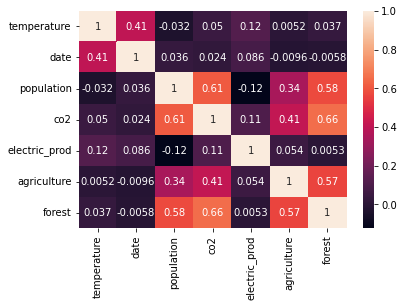

In [144]:
sns.heatmap(relacion.corr(), annot=True)

# Como era de esperarse, encontramos fuerte corelación entre la subida de temperatura con el crecimiento poblacional, emisiones de C02 y el consumo de electricidad.

In [145]:
mediana = relacion.groupby('date').median()
mediana

,temperature,population,co2,electric_prod,agriculture,forest
date,,,,,,
"1,990.0",0.5,"12,446,168.0","29,310.0","1,072.0","104,280.0","69,877.8"
"1,991.0",0.4,"12,815,400.0","28,820.0","1,096.2","104,160.0","69,668.3"
"1,992.0",0.3,"10,399,061.0","26,340.0","1,753.0","93,550.0","41,270.0"
"1,993.0",0.3,"10,776,595.0","26,275.0","1,535.6","96,460.0","43,424.1"
"1,994.0",0.6,"10,887,337.0","30,615.0","1,628.8","93,165.0","43,341.5"
"1,995.0",0.7,"10,986,437.0","30,630.0","1,606.4","92,560.0","43,111.0"
"1,996.0",0.3,"11,075,007.5","27,835.0","1,661.6","92,480.0","42,825.0"
"1,997.0",0.6,"11,220,808.0","28,195.0","1,747.2","92,535.0","42,539.0"
"1,998.0",1.1,"11,396,647.0","28,560.0","1,793.6","92,900.0","42,253.0"


 Métricas
 
 ---
Para probar las variables y observar que tengan sentido, se aplicó una gráfica de matriz de correlación y gráficas de scatter plot.


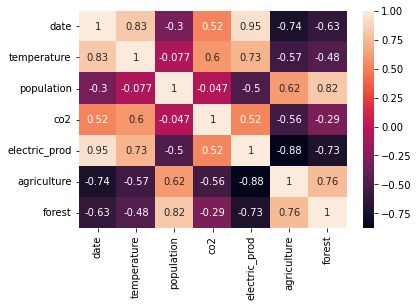

In [146]:
sns.heatmap(mediana.reset_index().corr(), annot=True)

In [147]:
from pandas.plotting import scatter_matrix

Hicimos un análisis multivariado para contrastar el efecto de las variables de interés entre sí. 

Vemos tendencias bastante obvias como el aumento de producción eléctrica yendo de la mano con el aumento de población, el uso de la variable fecha es bastante coherente pues muestra la evolución de las variables en el tiempo.

¿Cómo incide el CO2 en la temperatura?

Variables como el aumento en emisiones de CO2 y la producción de energía eléctrica presentan una correlación positiva con el aumento de temperatura.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d37cf050>,
      dtype=object)

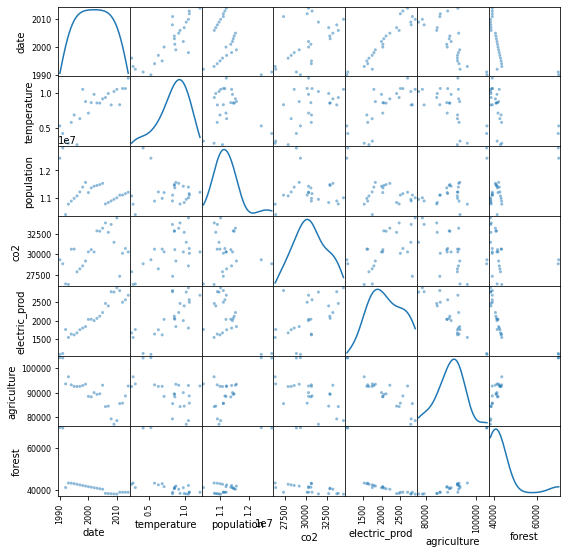

In [148]:
scatter_matrix(mediana.reset_index(), diagonal='kde', figsize=(9,9))

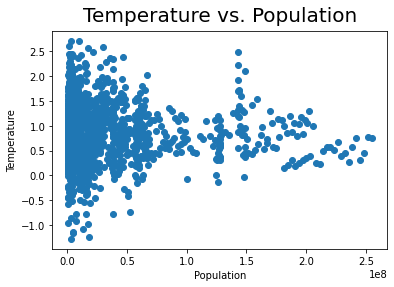

In [149]:
plt.scatter(relacion['population'],relacion['temperature'])
plt.title("Temperature vs. Population", fontsize=20, verticalalignment='bottom')
plt.xlabel("Population")
plt.ylabel("Temperature")
plt.show()

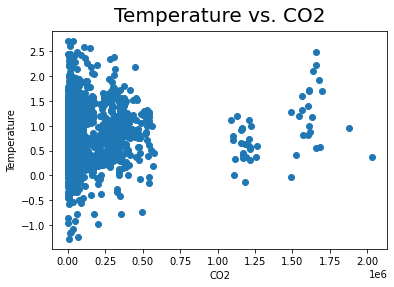

In [150]:
plt.scatter(relacion['co2'],relacion['temperature'])
plt.title("Temperature vs. CO2", fontsize=20, verticalalignment='bottom')
plt.xlabel("CO2")
plt.ylabel("Temperature")
plt.show()

In [151]:
# Necesitamos conocer el nombre especifico de las variables a considerar
# en nuestro modelo
relacion.columns 

Index(['Area', 'temperature', 'date', 'name', 'population', 'co2',
       'electric_prod', 'agriculture', 'forest'],
      dtype='object')

In [152]:
# importación de las librerias necesarias
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from bokeh.resources import INLINE
import bokeh.io
from bokeh import *

bokeh.io.output_notebook(INLINE)

In [153]:
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'temperature~co2' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1   = smf.ols(formula = model1, data = relacion).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.731
Date:                Thu, 27 Oct 2022   Prob (F-statistic):             0.0536
Time:                        23:08:25   Log-Likelihood:                -1306.2
No. Observations:                1521   AIC:                             2616.
Df Residuals:                    1519   BIC:                             2627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8322      0.016     50.763      0.0

Resultados

---
Lo que podemos observar en la matriz es que tanto, el aumento de los años, el crecimiento de la población y la producción de electricidad tienen correlación positiva con el aumento de temperatura así como los kilómetros cuadrados de bosque y la agricultura con inversamente proporcionales (correlación negativa).


In [154]:
%cd '/content/gdrive/MyDrive/dataScience/datasets'
!ls

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/dataScience/datasets'
/content/gdrive/MyDrive/dataScience
 all_weekly_excess_deaths.csv
 cambioTemperatura+AcevedoCarbajal.ipynb
 covid+AcevedoCarbajal.ipynb
 Data
'Datos API'
 imo+AcevedoCarbajal.ipynb
 imo_results.csv
 OriginalcambioTemperatura+AcevedoCarbajal1.ipynb
 StoryTelling
 Visualizaciones+AcevedoCarbajal.ipynb


In [155]:
!head 'Final.csv'

head: cannot open 'Final.csv' for reading: No such file or directory


DUDA: Tenemos una tabla que concentra todos los indicadores por paises pero queremos tener solo una coluna de año y que cada indicator name sea columna también. Sin embargo no sabemos como trasponer la tabla y que el country name se escriba para todas las nuevas filas que se generarían.

In [156]:
import pandas as pd
datafinal=pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/Final.csv',sep=';', encoding='cp1252', decimal=',')
datafinal["Indicator Name"].unique()
group= datafinal.groupby(['Country Name', 'Indicator Name'])
group.first()

Indicator Code  \
Country Name Indicator Name                                                          
Afghanistan  Access to electricity (% of population)                EG.ELC.ACCS.ZS   
             Agricultural irrigated land (% of total agricul...  AG.LND.IRIG.AG.ZS   
             Agricultural land (% of land area)                     AG.LND.AGRI.ZS   
             Agricultural land (sq. km)                             AG.LND.AGRI.K2   
             Agriculture, forestry, and fishing, value added...     NV.AGR.TOTL.ZS   
...                                                                            ...   
Zimbabwe     Urban land area where elevation is below 5 mete...  AG.LND.EL5M.UR.K2   
             Urban population                                          SP.URB.TOTL   
             Urban population (% of total population)            SP.URB.TOTL.IN.ZS   
             Urban population growth (annual %)                        SP.URB.GROW   
             Urban population living in areas where elevatio...  EN.POP.EL5M.UR.ZS   

                                                                       1990  \
Country Name Indicator Name                                                   
Afghanistan  Access to electricity (% of population)                    NaN   
             Agricultural irrigated land (% of total agricul...         NaN   
             Agricultural land (% of land area)                        58.3   
             Agricultural land (sq. km)                           380,400.0   
             Agriculture, forestry, and fishing, value added...         NaN   
...                                                                     ...   
Zimbabwe     Urban land area where elevation is below 5 mete...         NaN   
             Urban population                                   3,024,147.0   
             Urban population (% of total population)                  29.0   
             Urban population growth (annual %)                         5.3   
             Urban population living in areas where elevatio...         NaN   

                                                                       1991  \
Country Name Indicator Name                                                   
Afghanistan  Access to electricity (% of population)                    NaN   
             Agricultural irrigated land (% of total agricul...         NaN   
             Agricultural land (% of land area)                        58.3   
             Agricultural land (sq. km)                           380,300.0   
             Agriculture, forestry, and fishing, value added...         NaN   
...                                                                     ...   
Zimbabwe     Urban land area where elevation is below 5 mete...         NaN   
             Urban population                                   3,176,318.0   
             Urban population (% of total population)                  29.7   
             Urban population growth (annual %)                         4.9   
             Urban population living in areas where elevatio...         NaN   

                                                                       1992  \
Country Name Indicator Name                                                   
Afghanistan  Access to electricity (% of population)                    NaN   
             Agricultural irrigated land (% of total agricul...         NaN   
             Agricultural land (% of land area)                        58.3   
             Agricultural land (sq. km)                           380,300.0   
             Agriculture, forestry, and fishing, value added...         NaN   
...                                                                     ...   
Zimbabwe     Urban land area where elevation is below 5 mete...         NaN   
             Urban population                                   3,324,547.0   
             Urban population (% of total population)                  30.5   
             Urban popul

In [157]:
datafinal.head()

,Country Name,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0,99.2,99.2,99.2,100.0,100.0,100.0,...,93.4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,29.1,31.8,31.8,32.0,33.9,38.9,40.3,43.1,44.3
2,Afghanistan,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,43.2,69.1,68.3,89.5,71.5,97.7,97.7,96.6,97.7
3,Africa Western and Central,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,31.7,32.7,33.7,32.7,...,41.8,45.9,44.2,47.0,47.6,46.8,51.0,48.9,51.3,51.3
4,Angola,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.9,34.6,37.1,38.3,32.0,42.0,41.8,43.0,45.3,45.6


In [158]:
datafinal

,Country Name,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0,99.2,99.2,99.2,100.0,100.0,100.0,...,93.4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,29.1,31.8,31.8,32.0,33.9,38.9,40.3,43.1,44.3
2,Afghanistan,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,43.2,69.1,68.3,89.5,71.5,97.7,97.7,96.6,97.7
3,Africa Western and Central,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,31.7,32.7,33.7,32.7,...,41.8,45.9,44.2,47.0,47.6,46.8,51.0,48.9,51.3,51.3
4,Angola,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.9,34.6,37.1,38.3,32.0,42.0,41.8,43.0,45.3,45.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,Kosovo,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20395,"Yemen, Rep.",Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20396,South Africa,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20397,Zambia,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
datafinal["Indicator Name"].unique()

array(['Access to electricity (% of population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'Cereal yield (kg per hectare)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption 

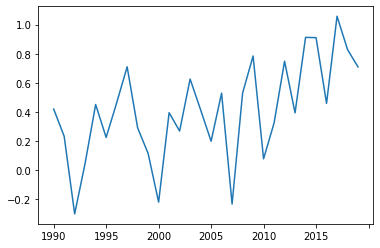

In [160]:
datafinal.query('`Indicator Name`== "Temperature change"').groupby('Country Name').first().loc['Argentina'].iloc[2:].plot()

In [161]:
consul=datafinal.query('`Indicator Name`== "Temperature change"').groupby('Country Name').first().loc['Argentina'].iloc[2:]
consul

1990    0.4
1991    0.2
1992   -0.3
1993    0.0
1994    0.5
1995    0.2
1996    0.5
1997    0.7
1998    0.3
1999    0.1
2000   -0.2
2001    0.4
2002    0.3
2003    0.6
2004    0.4
2005    0.2
2006    0.5
2007   -0.2
2008    0.5
2009    0.8
2010    0.1
2011    0.3
2012    0.7
2013    0.4
2014    0.9
2015    0.9
2016    0.5
2017    1.1
2018    0.8
2019    0.7
Name: Argentina, dtype: object

In [162]:
Argentina= datafinal.query('`Country Name`== "Argentina"')
Argentina.isnull().sum()

Country Name       0
Indicator Name     0
Indicator Code     0
1990              21
1991              27
1992              24
1993              27
1994              25
1995              27
1996              24
1997              22
1998              25
1999              25
2000              13
2001              25
2002              21
2003              25
2004              25
2005              21
2006              25
2007              22
2008              22
2009              24
2010              14
2011              23
2012              22
2013              29
2014              29
2015              35
2016              38
2017              42
2018              43
2019              49
dtype: int64

In [163]:
Argentina= datafinal.query('`Country Name`== "Argentina"').iloc[[0, 2, 6, 10, 18, 25,26,27,28,29,30,31, 36,39, 41, 42, 44, 45, 46, 47, 48, 49, 52, 63, 66, 67, 70, 71]]
Argentina

,Country Name,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,Argentina,Access to electricity (% of population),EG.ELC.ACCS.ZS,92.2,92.5,92.8,93.2,93.5,93.8,94.2,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
541,Argentina,Agricultural land (% of land area),AG.LND.AGRI.ZS,46.6,46.6,46.7,46.7,46.8,46.8,46.8,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
1605,Argentina,"Annual freshwater withdrawals, total (billion ...",ER.H2O.FWTL.K3,NaN,NaN,28.4,NaN,NaN,NaN,NaN,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
2669,Argentina,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
4797,Argentina,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN
6659,Argentina,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6925,Argentina,Ease of doing business rank (1=most business-f...,IC.BUS.EASE.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0
7191,Argentina,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,"1,304.0","1,347.6","1,410.4","1,496.9","1,576.8","1,648.9","1,728.1",...,"2,877.7","2,929.1","3,000.6","2,967.4","3,074.7",NaN,NaN,NaN,NaN,NaN
7457,Argentina,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1.3,1.7,1.5,1.9,3.6,2.8,2.8,...,2.4,2.8,2.9,2.5,2.2,2.0,NaN,NaN,NaN,NaN
7723,Argentina,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,35.2,30.3,34.7,38.8,42.4,40.0,32.9,...,26.8,30.6,27.2,29.4,29.6,26.2,NaN,NaN,NaN,NaN


In [164]:
Argentina["Indicator Name"].unique()

array(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

In [165]:
Argentina.index = Argentina['Indicator Name']
Argentina= Argentina.drop('Indicator Name', axis='columns')
Argentina.head()

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),Argentina,EG.ELC.ACCS.ZS,92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
Agricultural land (% of land area),Argentina,AG.LND.AGRI.ZS,46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
"Annual freshwater withdrawals, total (billion cubic meters)",Argentina,ER.H2O.FWTL.K3,NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
CO2 emissions (kg per 2015 US$ of GDP),Argentina,EN.ATM.CO2E.KD.GD,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
CO2 emissions from liquid fuel consumption (kt),Argentina,EN.ATM.CO2E.LF.KT,"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN


In [166]:
Argentina0=Argentina.drop('Indicator Code', axis='columns')

In [167]:
Argentina1=Argentina0.drop('Country Name', axis='columns')

In [168]:
Argentina1.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,94.8,95.1,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
Agricultural land (% of land area),46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,46.9,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
"Annual freshwater withdrawals, total (billion cubic meters)",NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,NaN,NaN,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
CO2 emissions (kg per 2015 US$ of GDP),0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
CO2 emissions from liquid fuel consumption (kt),"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8","69,632.7","72,071.2",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN


In [169]:
Argentina1.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [170]:
Arg=Argentina1.reset_index()
Arg

,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Access to electricity (% of population),92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,94.8,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
1,Agricultural land (% of land area),46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
2,"Annual freshwater withdrawals, total (billion ...",NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,NaN,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
3,CO2 emissions (kg per 2015 US$ of GDP),0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
4,CO2 emissions from liquid fuel consumption (kt),"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8","69,632.7",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN
5,"Droughts, floods, extreme temperatures (% of p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ease of doing business rank (1=most business-f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0
7,Electric power consumption (kWh per capita),"1,304.0","1,347.6","1,410.4","1,496.9","1,576.8","1,648.9","1,728.1","1,848.0","1,967.3",...,"2,877.7","2,929.1","3,000.6","2,967.4","3,074.7",NaN,NaN,NaN,NaN,NaN
8,Electricity production from coal sources (% of...,1.3,1.7,1.5,1.9,3.6,2.8,2.8,2.6,2.4,...,2.4,2.8,2.9,2.5,2.2,2.0,NaN,NaN,NaN,NaN
9,Electricity production from hydroelectric sour...,35.2,30.3,34.7,38.8,42.4,40.0,32.9,38.7,35.7,...,26.8,30.6,27.2,29.4,29.6,26.2,NaN,NaN,NaN,NaN


In [171]:
Arg1=Arg.transpose()
Arg1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion ...",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of p...",Ease of doing business rank (1=most business-f...,Electric power consumption (kWh per capita),Electricity production from coal sources (% of...,Electricity production from hydroelectric sour...,...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons ...,Other greenhouse gas emissions (% change from ...,Population growth (annual %),Rural population living in areas where elevati...,Temperature change,Terrestrial and marine protected areas (% of t...,Total greenhouse gas emissions (kt of CO2 equi...,Urban land area where elevation is below 5 met...
1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,35.2,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,30.3,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,34.7,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,38.8,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,42.4,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,40.0,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,32.9,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,38.7,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,35.7,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN


In [172]:
Arg1.columns = ['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       'Population growth (annual %)',
       'Rural population living in areas where elevation is below 5 meters (% of total population)',
       'Temperature change',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban land area where elevation is below 5 meters (% of total land area)']
Arg1.columns

Index(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

In [173]:
Arg1b=Arg1.drop(Arg1.index[[0]])
Arg1b

,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,35.2,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,30.3,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,34.7,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,38.8,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,42.4,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,40.0,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,32.9,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,38.7,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,35.7,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,26.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [174]:
Arg1b.columns

Index(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

In [175]:
Arg1c=Arg1b.reset_index()
Arg1c

,index,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
0,1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1,1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
2,1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
3,1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
4,1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
5,1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
6,1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
7,1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
8,1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
9,1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [176]:
Arg1c=Arg1c.rename({'index': 'date'}, axis=1)
Arg1c

,date,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
0,1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1,1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
2,1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
3,1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
4,1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
5,1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
6,1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
7,1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
8,1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
9,1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [177]:
Arg1c['date'] = Arg1c['date'].astype(float)
Arg1c['Access to electricity (% of population)'] = Arg1c['Access to electricity (% of population)'].astype(float)
Arg1c['Agricultural land (% of land area)'] = Arg1c['Agricultural land (% of land area)'].astype(float)
Arg1c['Annual freshwater withdrawals, total (billion cubic meters)'] = Arg1c['Annual freshwater withdrawals, total (billion cubic meters)'].astype(float)
Arg1c['CO2 emissions (kg per 2015 US$ of GDP)'] = Arg1c['CO2 emissions (kg per 2015 US$ of GDP)'].astype(float)
Arg1c['CO2 emissions from liquid fuel consumption (kt)'] = Arg1c['CO2 emissions from liquid fuel consumption (kt)'].astype(float)
Arg1c['Droughts, floods, extreme temperatures (% of population, average 1990-2009)'] = Arg1c['Droughts, floods, extreme temperatures (% of population, average 1990-2009)'].astype(float)
Arg1c['Ease of doing business rank (1=most business-friendly regulations)'] = Arg1c['Ease of doing business rank (1=most business-friendly regulations)'].astype(float)
Arg1c['Electric power consumption (kWh per capita)'] = Arg1c['Electric power consumption (kWh per capita)'].astype(float)
Arg1c['Electricity production from coal sources (% of total)'] = Arg1c['Electricity production from coal sources (% of total)'].astype(float)
Arg1c['Electricity production from nuclear sources (% of total)'] = Arg1c['Electricity production from nuclear sources (% of total)'].astype(float)
Arg1c['Electricity production from hydroelectric sources (% of total)'] = Arg1c['Electricity production from hydroelectric sources (% of total)'].astype(float)
Arg1c['Electricity production from natural gas sources (% of total)'] = Arg1c['Electricity production from natural gas sources (% of total)'].astype(float)
Arg1c['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)'] = Arg1c['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)'].astype(float)
Arg1c['Forest area (sq. km)'] = Arg1c['Forest area (sq. km)'].astype(float)
Arg1c['HFC gas emissions (thousand metric tons of CO2 equivalent)'] = Arg1c['HFC gas emissions (thousand metric tons of CO2 equivalent)'].astype(float)
Arg1c['Land area where elevation is below 5 meters (% of total land area)'] = Arg1c['Land area where elevation is below 5 meters (% of total land area)'].astype(float)
Arg1c['Methane emissions (% change from 1990)'] = Arg1c['Methane emissions (% change from 1990)'].astype(float)
Arg1c['Methane emissions (kt of CO2 equivalent)'] = Arg1c['Methane emissions (kt of CO2 equivalent)'].astype(float)
Arg1c['Mortality rate, under-5 (per 1,000 live births)'] = Arg1c['Mortality rate, under-5 (per 1,000 live births)'].astype(float)
Arg1c['Nitrous oxide emissions (% change from 1990)'] = Arg1c['Nitrous oxide emissions (% change from 1990)'].astype(float)
Arg1c['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] = Arg1c['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'].astype(float)
Arg1c['Other greenhouse gas emissions (% change from 1990)'] = Arg1c['Other greenhouse gas emissions (% change from 1990)'].astype(float)
Arg1c['Population growth (annual %)'] = Arg1c['Population growth (annual %)'].astype(float)
Arg1c['Rural population living in areas where elevation is below 5 meters (% of total population)'] = Arg1c['Rural population living in areas where elevation is below 5 meters (% of total population)'].astype(float)
Arg1c['Temperature change'] = Arg1c['Temperature change'].astype(float)
Arg1c['Terrestrial and marine protected areas (% of total territorial area)'] = Arg1c['Terrestrial and marine protected areas (% of total territorial area)'].astype(float)
Arg1c['Total greenhouse gas emissions (kt of CO2 equivalent)'] = Arg1c['Total greenhouse gas emissions (kt of CO2 equivalent)'].astype(float)
Arg1c['Urban land area where elevation is below 5 meters (% of total land area)'] = Arg1c['Urban land area where elevation is below 5 meters (% of total land area)'].astype(float)

In [178]:
Arg1c.columns

Index(['date', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 mete

In [179]:
argborra=Arg1c.drop(['Annual freshwater withdrawals, total (billion cubic meters)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 'Ease of doing business rank (1=most business-friendly regulations)', 'Rural population living in areas where elevation is below 5 meters (% of total population)', 'Terrestrial and marine protected areas (% of total territorial area)', 'Urban land area where elevation is below 5 meters (% of total land area)', 'Land area where elevation is below 5 meters (% of total land area)', 'HFC gas emissions (thousand metric tons of CO2 equivalent)'], axis=1)
#invoices.drop(['invoice', 'client', 'units'], axis=1)
argborra


,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
0,"1,990.0",92.2,46.6,0.4,"59,236.7","1,304.0",1.3,35.2,39.2,14.3,...,"352,040.0",NaN,"109,580.0",28.6,NaN,"35,570.0",NaN,1.5,0.4,"247,300.0"
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"


In [180]:
argborra

,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
0,"1,990.0",92.2,46.6,0.4,"59,236.7","1,304.0",1.3,35.2,39.2,14.3,...,"352,040.0",NaN,"109,580.0",28.6,NaN,"35,570.0",NaN,1.5,0.4,"247,300.0"
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"


In [181]:
argframe=argborra.dropna()
argframe

,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,"2,000.0",95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [182]:
argframe.columns

Index(['date', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)', 'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       '

In [183]:
argframe=argframe.rename({'Access to electricity (% of population)': 'accesstoelectricity'}, axis=1)
argframe=argframe.rename({'Agricultural land (% of land area)': 'agriculturalland'}, axis=1)
argframe=argframe.rename({'CO2 emissions (kg per 2015 US$ of GDP)': 'co2emissions'}, axis=1)
argframe=argframe.rename({'CO2 emissions from liquid fuel consumption (kt)': 'co2emissionsliquid'}, axis=1)
argframe=argframe.rename({'Electric power consumption (kWh per capita)': 'electricpower'}, axis=1)
argframe=argframe.rename({'Electricity production from coal sources (% of total)': 'electricityproductionfromcoalsources'}, axis=1)
argframe=argframe.rename({'Electricity production from hydroelectric sources (% of total)': 'electricityproductionfromhydroelectricsources'}, axis=1)
argframe=argframe.rename({'Electricity production from natural gas sources (% of total)': 'electricityproductionfromnaturalgassources'}, axis=1)
argframe=argframe.rename({'Electricity production from nuclear sources (% of total)': 'electricityproductionfromnuclearsources'}, axis=1)
argframe=argframe.rename({'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)': 'energyuse'}, axis=1)
argframe=argframe.rename({'Forest area (sq. km)': 'forestarea'}, axis=1)
argframe=argframe.rename({'Methane emissions (% change from 1990)': 'metheaneemissionschange'}, axis=1)
argframe=argframe.rename({'Methane emissions (kt of CO2 equivalent)': 'methaneemissions'}, axis=1)
argframe=argframe.rename({'Mortality rate, under-5 (per 1,000 live births)': 'mortalityrate'}, axis=1)
argframe=argframe.rename({'Nitrous oxide emissions (% change from 1990)': 'nitrousoxideemissionschange'}, axis=1)
argframe=argframe.rename({'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)': 'nitrousoxideemissionsmetric'}, axis=1)
argframe=argframe.rename({'Other greenhouse gas emissions (% change from 1990)': 'greenhousegasemissions'}, axis=1)
argframe=argframe.rename({'Population growth (annual %)': 'population'}, axis=1)
argframe=argframe.rename({'Temperature change': 'temperaturechange'}, axis=1)
argframe=argframe.rename({'Total greenhouse gas emissions (kt of CO2 equivalent)': 'totalgreenhousegasemissions'}, axis=1)


argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,"2,000.0",95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [184]:
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'temperaturechange~date' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1   = smf.ols(formula = model1, data = argframe).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:      temperaturechange   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.171
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.156
Time:                        23:08:27   Log-Likelihood:                -3.5179
No. Observations:                  22   AIC:                             11.04
Df Residuals:                      20   BIC:                             13.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2080     20.029     -1.458      0.1

In [185]:
model4 = 'temperaturechange~date + accesstoelectricity +	agriculturalland +	co2emissions + co2emissionsliquid +	electricpower +	electricityproductionfromcoalsources +	electricityproductionfromhydroelectricsources +	electricityproductionfromnaturalgassources +	electricityproductionfromnuclearsources	+	forestarea +	metheaneemissionschange +	methaneemissions +	mortalityrate +	nitrousoxideemissionschange +	nitrousoxideemissionsmetric +	greenhousegasemissions +	population +	totalgreenhousegasemissions'
lm4    = smf.ols(formula = model4, data = argframe).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:      temperaturechange   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.097
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.581
Time:                        23:08:27   Log-Likelihood:                 22.143
No. Observations:                  22   AIC:                            -4.286
Df Residuals:                       2   BIC:                             17.53
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [186]:
argframe.corr()

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
date,1.0,1.0,0.9,-0.5,0.8,1.0,-0.1,-0.6,0.6,-0.9,...,-1.0,-0.8,0.7,-1.0,0.9,0.8,0.7,-0.8,0.3,1.0
accesstoelectricity,1.0,1.0,0.9,-0.5,0.8,1.0,-0.1,-0.5,0.6,-1.0,...,-1.0,-0.8,0.6,-1.0,0.9,0.8,0.7,-0.8,0.3,0.9
agriculturalland,0.9,0.9,1.0,-0.6,0.9,0.9,0.1,-0.7,0.4,-0.8,...,-0.9,-0.8,0.6,-0.8,0.9,0.7,0.5,-0.6,0.2,0.9
co2emissions,-0.5,-0.5,-0.6,1.0,-0.8,-0.6,-0.5,0.2,0.0,0.5,...,0.6,0.6,-0.0,0.5,-0.4,-0.2,-0.1,0.4,-0.2,-0.5
co2emissionsliquid,0.8,0.8,0.9,-0.8,1.0,0.8,0.3,-0.7,0.3,-0.6,...,-0.8,-0.7,0.4,-0.7,0.7,0.6,0.4,-0.6,0.2,0.8
electricpower,1.0,1.0,0.9,-0.6,0.8,1.0,-0.0,-0.6,0.6,-0.9,...,-1.0,-0.8,0.6,-1.0,0.9,0.8,0.7,-0.8,0.3,1.0
electricityproductionfromcoalsources,-0.1,-0.1,0.1,-0.5,0.3,-0.0,1.0,-0.0,-0.3,0.1,...,0.1,-0.1,-0.4,0.1,-0.2,-0.2,-0.5,0.2,0.1,-0.0
electricityproductionfromhydroelectricsources,-0.6,-0.5,-0.7,0.2,-0.7,-0.6,-0.0,1.0,-0.6,0.5,...,0.6,0.5,-0.4,0.5,-0.5,-0.5,-0.5,0.4,0.0,-0.7
electricityproductionfromnaturalgassources,0.6,0.6,0.4,0.0,0.3,0.6,-0.3,-0.6,1.0,-0.7,...,-0.6,-0.3,0.6,-0.7,0.6,0.6,0.8,-0.7,0.1,0.6
electricityproductionfromnuclearsources,-0.9,-1.0,-0.8,0.5,-0.6,-0.9,0.1,0.5,-0.7,1.0,...,0.9,0.7,-0.7,1.0,-0.9,-0.8,-0.7,0.8,-0.2,-0.9


In [187]:
argframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 22
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   date                                           22 non-null     float64
 1   accesstoelectricity                            22 non-null     float64
 2   agriculturalland                               22 non-null     float64
 3   co2emissions                                   22 non-null     float64
 4   co2emissionsliquid                             22 non-null     float64
 5   electricpower                                  22 non-null     float64
 6   electricityproductionfromcoalsources           22 non-null     float64
 7   electricityproductionfromhydroelectricsources  22 non-null     float64
 8   electricityproductionfromnaturalgassources     22 non-null     float64
 9   electricityproductionfromnuclearsources        22 non-nu

In [188]:
argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,"2,000.0",95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [189]:
#argframe['date'] = pd.to_datetime(argframe['date'])
argframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 22
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   date                                           22 non-null     float64
 1   accesstoelectricity                            22 non-null     float64
 2   agriculturalland                               22 non-null     float64
 3   co2emissions                                   22 non-null     float64
 4   co2emissionsliquid                             22 non-null     float64
 5   electricpower                                  22 non-null     float64
 6   electricityproductionfromcoalsources           22 non-null     float64
 7   electricityproductionfromhydroelectricsources  22 non-null     float64
 8   electricityproductionfromnaturalgassources     22 non-null     float64
 9   electricityproductionfromnuclearsources        22 non-nu

In [190]:
argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,"1,991.0",92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,"1,992.0",92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,"1,993.0",93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,"1,994.0",93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,"1,995.0",93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,"1,996.0",94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,"1,997.0",94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,"1,998.0",94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,"1,999.0",95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,"2,000.0",95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [192]:
da= pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/datosApi.csv', sep=',', encoding='cp1252')
daa=da[['datetime','tempmax','tempmin','feelslikemax','feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','snow','snowdepth','windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy','uvindex', 'sunrise', 'sunset', 'moonphase', 'conditions']]
daa

,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-09-11,19.8,12.8,19.8,12.8,16.5,7.3,58.8,0.0,0,...,"1,013.7",36.4,10.0,188.1,16.2,9,2020-09-11T06:57:46,2020-09-11T18:42:37,0.8,Partially cloudy
1,2020-09-12,14.6,9.3,14.6,8.1,12.6,6.0,64.4,0.0,0,...,"1,017.3",24.5,10.0,240.5,20.7,10,2020-09-12T06:56:22,2020-09-12T18:43:19,0.9,Partially cloudy
2,2020-09-13,17.7,10.4,17.7,10.4,14.9,9.2,70.9,0.0,0,...,"1,016.5",24.2,9.7,219.2,18.9,8,2020-09-13T06:54:57,2020-09-13T18:44:01,0.9,Partially cloudy
3,2020-09-14,15.2,8.7,15.2,7.7,12.5,0.2,42.8,0.0,0,...,"1,027.4",0.0,9.9,249.3,21.5,10,2020-09-14T06:53:32,2020-09-14T18:44:44,0.9,Clear
4,2020-09-15,14.9,10.5,14.9,10.5,12.7,4.9,59.6,0.0,0,...,"1,021.9",43.7,10.0,103.5,8.9,6,2020-09-15T06:52:07,2020-09-15T18:45:26,1.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2022-09-17,22.5,15.7,22.5,15.7,18.8,13.2,70.3,0.0,0,...,"1,017.3",79.0,10.0,176.8,15.2,6,2022-09-17T06:49:59,2022-09-17T18:46:32,0.7,Partially cloudy
737,2022-09-18,18.9,16.1,18.9,16.1,17.7,13.8,77.9,0.0,0,...,"1,013.6",87.7,10.0,166.0,14.4,6,2022-09-18T06:48:33,2022-09-18T18:47:15,0.8,Partially cloudy
738,2022-09-19,21.6,14.8,21.6,14.8,18.1,12.4,71.4,0.0,100,...,"1,013.8",56.1,9.8,214.0,18.6,8,2022-09-19T06:47:08,2022-09-19T18:47:58,0.8,"Rain, Partially cloudy"
739,2022-09-20,15.7,8.8,15.7,6.4,11.8,6.8,69.8,0.0,0,...,"1,017.6",62.0,10.0,191.9,16.6,5,2022-09-20T06:45:42,2022-09-20T18:48:41,0.9,Partially cloudy


In [193]:
# remplazar  "?" con NaN
daa.replace("?", np.nan, inplace = True)
daa.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-09-11,19.8,12.8,19.8,12.8,16.5,7.3,58.8,0.0,0,...,"1,013.7",36.4,10.0,188.1,16.2,9,2020-09-11T06:57:46,2020-09-11T18:42:37,0.8,Partially cloudy
1,2020-09-12,14.6,9.3,14.6,8.1,12.6,6.0,64.4,0.0,0,...,"1,017.3",24.5,10.0,240.5,20.7,10,2020-09-12T06:56:22,2020-09-12T18:43:19,0.9,Partially cloudy
2,2020-09-13,17.7,10.4,17.7,10.4,14.9,9.2,70.9,0.0,0,...,"1,016.5",24.2,9.7,219.2,18.9,8,2020-09-13T06:54:57,2020-09-13T18:44:01,0.9,Partially cloudy
3,2020-09-14,15.2,8.7,15.2,7.7,12.5,0.2,42.8,0.0,0,...,"1,027.4",0.0,9.9,249.3,21.5,10,2020-09-14T06:53:32,2020-09-14T18:44:44,0.9,Clear
4,2020-09-15,14.9,10.5,14.9,10.5,12.7,4.9,59.6,0.0,0,...,"1,021.9",43.7,10.0,103.5,8.9,6,2020-09-15T06:52:07,2020-09-15T18:45:26,1.0,Partially cloudy


In [194]:
missing_data = daa.isnull()
missing_data.head(5)

,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [195]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

datetime
False    741
Name: datetime, dtype: int64

tempmax
False    741
Name: tempmax, dtype: int64

tempmin
False    741
Name: tempmin, dtype: int64

feelslikemax
False    741
Name: feelslikemax, dtype: int64

feelslikemin
False    741
Name: feelslikemin, dtype: int64

feelslike
False    741
Name: feelslike, dtype: int64

dew
False    741
Name: dew, dtype: int64

humidity
False    741
Name: humidity, dtype: int64

precip
False    741
Name: precip, dtype: int64

precipprob
False    741
Name: precipprob, dtype: int64

precipcover
False    741
Name: precipcover, dtype: int64

snow
False    741
Name: snow, dtype: int64

snowdepth
False    741
Name: snowdepth, dtype: int64

windgust
False    414
True     327
Name: windgust, dtype: int64

windspeed
False    741
Name: windspeed, dtype: int64

winddir
False    741
Name: winddir, dtype: int64

sealevelpressure
False    739
True       2
Name: sealevelpressure, dtype: int64

cloudcover
False    741
Name: cloudcover, dtype: int64

visibility
Fal

In [196]:
avg_windgust = daa["windgust"].astype("float").mean(axis=0)
print("Average of windgust:", avg_windgust)

Average of windgust: 41.02270531400966


In [197]:
daa["windgust"].replace(np.nan, avg_windgust, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [198]:
avg_slp = daa["sealevelpressure"].astype("float").mean(axis=0)
print("Average of sealevelpressure:", avg_slp)

Average of sealevelpressure: 1016.0802435723951


In [200]:
daa["sealevelpressure"].replace(np.nan, avg_slp, inplace=True)

In [202]:
daa2 = daa.rename(columns={'name':'Country',
                                   'datetime':'date'})

daa2.columns

Index(['date', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions'],
      dtype='object')

In [203]:
daa2['date'] = pd.to_datetime(daa2['date'])
daa2['date']

0     2020-09-11
1     2020-09-12
2     2020-09-13
3     2020-09-14
4     2020-09-15
         ...    
736   2022-09-17
737   2022-09-18
738   2022-09-19
739   2022-09-20
740   2022-09-21
Name: date, Length: 741, dtype: datetime64[ns]

In [204]:
#daa2['date'] = daa2['date'].astype(float)
daa2['precipprob'] = daa2['precipprob'].astype(float)
daa2['uvindex'] = daa2['uvindex'].astype(float)
daa2['uvindex'] = daa2['uvindex'].astype(float)

In [205]:
daa2['date'] = daa2['date'].astype(str)

In [206]:
argframe['date'] = argframe['date'].astype(str)

In [207]:
argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,1991.0,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992.0,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993.0,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994.0,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995.0,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996.0,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997.0,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998.0,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999.0,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,2000.0,95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


Finalmente se integra el dataset como filas y nuevas variables

In [208]:
df_merge1 = pd.merge(argframe,
                    daa2, on='date',
                    how = 'outer')
df_merge1

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,1991.0,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992.0,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993.0,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994.0,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995.0,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,017.3",79.0,10.0,176.8,15.2,6.0,2022-09-17T06:49:59,2022-09-17T18:46:32,0.7,Partially cloudy
759,2022-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,013.6",87.7,10.0,166.0,14.4,6.0,2022-09-18T06:48:33,2022-09-18T18:47:15,0.8,Partially cloudy
760,2022-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,013.8",56.1,9.8,214.0,18.6,8.0,2022-09-19T06:47:08,2022-09-19T18:47:58,0.8,"Rain, Partially cloudy"
761,2022-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,017.6",62.0,10.0,191.9,16.6,5.0,2022-09-20T06:45:42,2022-09-20T18:48:41,0.9,Partially cloudy


Resultados

En el caso particular de Argentina, las variables que destacan son: el acceso a la electricidad y la agricultura, ademas del cambio de emisiones de gases. Esto tiene sentido ya que la agricultura es una actividad muy explotada en el pais y soobre todo en la ganaderia  ya que pueden generar estos gases. Por otra parte, el resultado contiene variables que tambiens e presenta en la media de otros paises que son la relacionada con el consumo y el acceso a la electricidad.

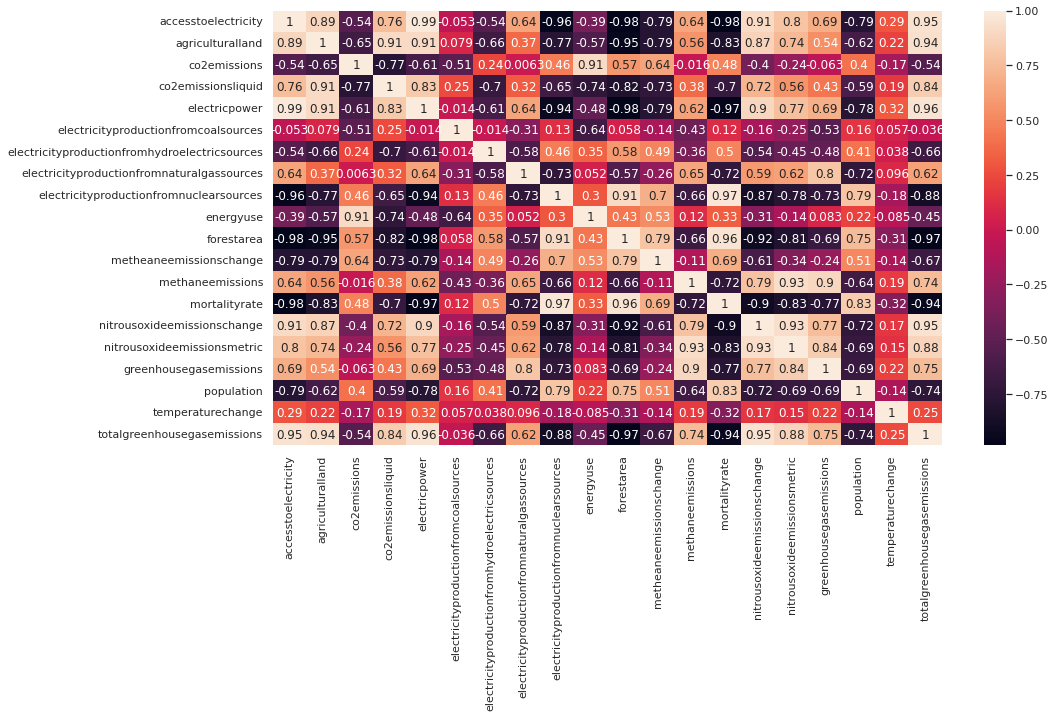

In [209]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(argframe.corr(), annot=True)

Analisis Univariado
Estuadio de la variacion de temperatra en Argentina

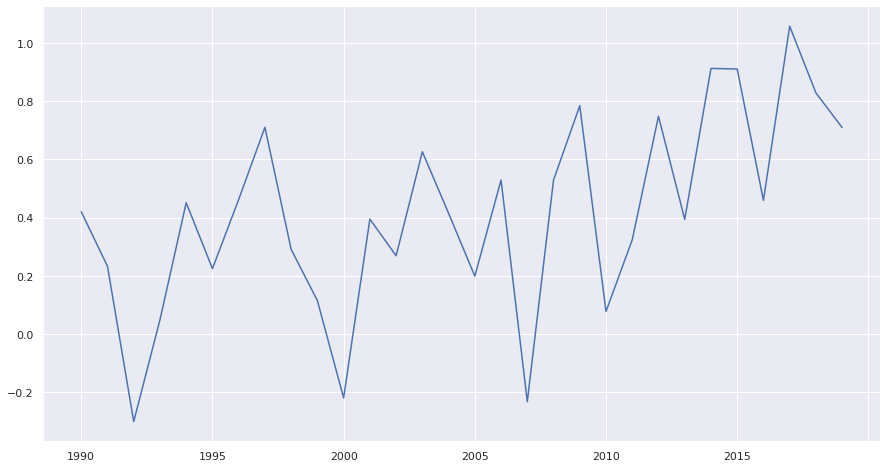

In [210]:
datafinal.query('`Indicator Name`== "Temperature change"').groupby('Country Name').first().loc['Argentina'].iloc[2:].plot()

Analisis multivariado

Estudio de la variacion del tiempo en funcion de la poplacion, co2, el consumo electrico y la forestacion del mundo y en Argentina, en el mismo periodo de tiempo

In [211]:
from pandas.plotting import parallel_coordinates

In [213]:
relacion

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
5,Australia,0.5,"1,990.0",AUS,"17,065,100.0","263,630.0","8,527.2","4,644,370.0","1,338,822.0"
7,Bahrain,0.4,"1,990.0",BHR,"495,927.0","10,740.0","15,621.3",80.0,2.2
13,Brazil,0.5,"1,990.0",BRA,"149,003,225.0","197,900.0","1,460.8","2,349,000.0","5,888,980.0"
14,Brunei Darussalam,0.5,"1,990.0",BRN,"258,714.0","3,260.0","4,325.2",110.0,"4,130.0"
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.7,"2,014.0",UKR,"45,272,155.0","237,730.0","3,418.6","415,110.0","96,352.0"
2471,United Kingdom,1.7,"2,014.0",GBR,"64,602,298.0","415,600.0","5,130.4","172,320.0","31,358.0"
2472,Uruguay,1.1,"2,014.0",URY,"3,400,439.0","6,500.0","3,085.2","142,948.0","18,822.6"
2473,Uzbekistan,0.2,"2,014.0",UZB,"30,757,700.0","104,870.0","1,645.4","255,420.0","35,094.4"


In [215]:
arg = relacion[
  relacion['Area'].isin(['Argentina',
                         
                     

                              ])
][['Area',
     'temperature',
     'co2',
     'agriculture',
   'forest'
     ]]

**¿Qué actividad industrial/económica que haya emergido en el tiempo puede relacionarse con el cambio de temperatura?**

Aparte del uso de energía eléctrica y el CO2 en el caso particular de Argentina destacan las actividades Agrícolas y la deforestación. La evolución de las ciudades ha hecho que las industrias alimentarias tengan que emplear métodos intensivos que pueden no ser sostenibles. 

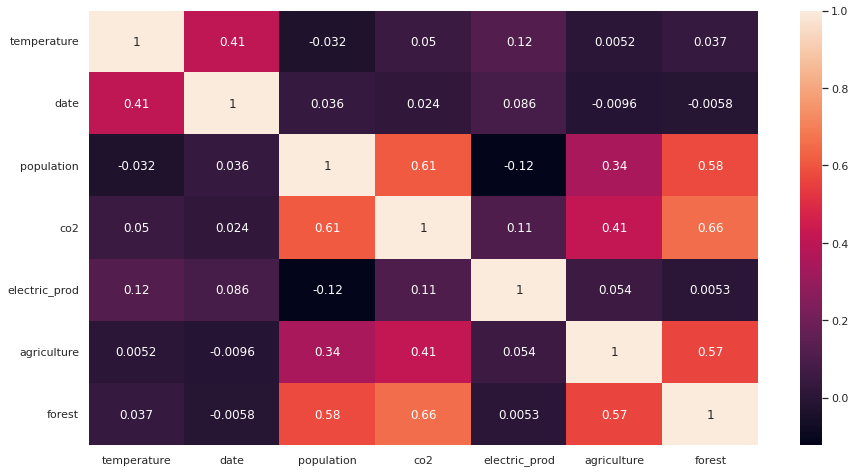

In [216]:
sns.heatmap(relacion.corr(), annot=True)

**¿Cómo se comportan el resto de las variables?**

Otra forma de ver el impacto de las variables entre sí es por medio de los mapas de calor. En este caso se pueden visualizar mejor las relaciones entre sí. 

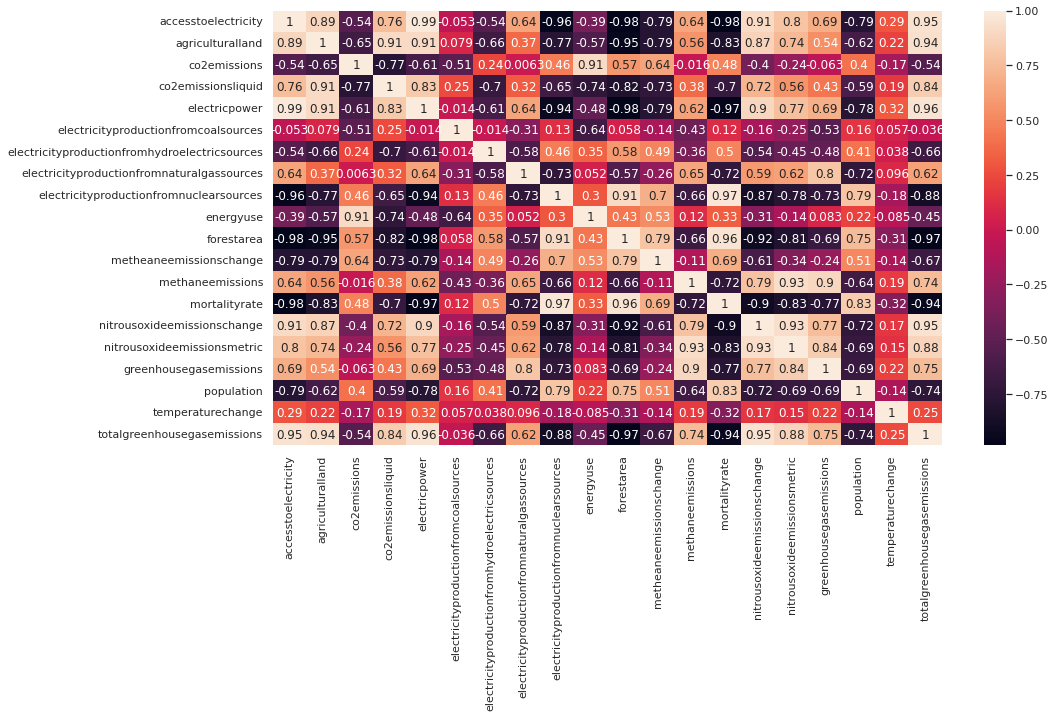

In [217]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(argframe.corr(), annot=True)

In [219]:
datafinal=datafinal.drop('Indicator Name', axis='columns')

In [220]:
datafinal=datafinal.drop('Indicator Code', axis='columns')

In [222]:
datafinal= datafinal.dropna()

In [223]:
datafinal

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,100.0,99.2,99.2,99.2,100.0,100.0,100.0,100.0,100.0,...,93.4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,Albania,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,99.9,100.0,99.9,100.0,99.9,99.9,100.0,100.0
6,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,United Arab Emirates,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,Argentina,92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,94.8,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20127,Samoa,0.5,0.7,1.2,1.4,1.4,1.2,1.1,0.9,0.9,...,-0.3,-0.3,-0.3,-0.4,-0.4,-0.6,-0.7,-0.8,-0.7,-0.5
20129,"Yemen, Rep.",7.2,7.6,7.8,7.7,7.3,6.5,5.7,5.2,4.9,...,4.6,4.6,4.6,4.5,4.4,4.4,4.3,4.2,4.1,4.0
20130,South Africa,3.4,3.5,3.4,3.4,3.2,3.0,2.8,2.6,2.5,...,2.3,2.4,2.4,2.4,2.4,2.3,2.3,2.2,2.1,2.1
20131,Zambia,2.6,1.5,1.2,1.2,1.2,1.3,1.4,1.5,1.5,...,4.2,4.3,4.4,4.4,4.4,4.3,4.3,4.2,4.2,4.2


**Recomendaciones**

Ya que conocemos el impacto que tienen las emisiones y uso de energía. Para palear el efecto de la temperatura, sería recomendable incentivar el uso de energías renovables. 

En cuestión de la deforestación, se puede aprovechar el territorio para fomentar el crecimiento de la extensión forestal. También consideramos importante el control de la actividad agrícola para evitar efectos nocivos en el medio ambiente.
